# REDES TRANSCRIPCIONALES

# ÍNDICE

1. [INTRODUCCIÓN](#introduccion)

2. [OBJETIVOS](#objetivos)

3. [ANÁLISIS DE Chip-Seq](#chip)
    
4. [CONSTRUCCIÓN DE LA RED](#red)

5. [CONCLUSIONES](#conclusiones)

6. [REFERENCIAS](#referencias)

<a id="introduccion"></a>

## 1. INTRODUCCIÓN 

Las redes de coexpresión génica incluyen un conjunto de genes que se expresan orquestados conjuntamente. No obstante, el hecho de que estos genes estén coexpresados no implica que estén corregulados.
Para realizar el estudio de __redes de corregulacón génica__ se utilizan los datos obtenidos de análisis de ChIP-Seq.

De este modo, a partir del análisis para diversos factores de transcripción se obtienen sendas listas de genes dianas para cada uno de los factores de transcripción analizados. A partir de estos genes diana, se puede construir la red de corregulación.
Cabe mencionar que a diferencia de las redes de coexpresión, las redes de corregulación son __redes dirigidas__. En este caso, se tiene un factor de transcripción que se une al promotor de un gen y hace que se exprese. Si, además, el gen es codificante de una enzima que participa en una ruta metabólica, se estaría trabajando a su vez con una red metabólica y sería interesante integrar ambas redes.

<a id="objetivos"></a>

## 2. OBJETIVOS

El objetivo de esta tarea es la obtención de un red cotranscripcional para los genes dianas obtenidos tras la realización de análisis de ChIP-Seq para 10 factores de transcripción de _Arabidopsis thaliana._

<a id="chip"></a>

## 3. ANÁLISIS DE ChIP-Seq

Para poder crear la red de transcripción, se realiza un análisis de ChIP-Seq de 10 factores de transcripción. Los diferentes factores y los genes diana de cada uno de ellos, se enumeran a continuación.

- __LHY__
Es un factor de transcripción relacionado con el ritmo circadiano. La lista de genes diana de este factor es la siguiente: [Genes diana LHY](LHY.txt)

- __APRR9__
Es un factor de transcripción relacionado con el ritmo circadiano. La lista de genes diana de este factor es la siguiente: [Genes diana APRR9](APRR9.txt)

- __ATMYB3R3 (DOMINIO PROTEICO MYB)__
Es un factor de transcripción relacionado con la división celular. La lista de genes diana de este factor es la siguiente: [Genes diana ATMYB3R3](ATMYB.txt)

- __PROTEÍNA NUCLEAR 1 ASOCIADA A EIN2 (ENAP1)__
Es un factor de transcripción relacionado con la transcripción de proteínas de virulencia. La lista de genes diana de este factor es la siguiente: [Genes diana ENAP1](ENAP1.txt)

- __HISTONA ACETILTRANSFERASA (HAF2)__
Relacionado con la integración de la luz. La lista de genes dianas de este factor es la siguiente: [Genes diana HAF2](HAF2.txt)

- __PROTEÍNA 3 CON DOMINIO DEK (DEK3)__
Este factor de transcripción codifica para proteína de modulación de la cromatina. Los genes diana de este factor son los siguientes: [Genes diana DEK3](DEK3.txt)

- __AP2__
Este factor de transcripción está relacionado con la floraicón. La lista de genes diana es la siguiente: [Genes diana AP2](AP2.txt)

- __PRR5__
Este factor de transcripción está relacionado con el reloj circadiano. La lista de genes diana es la siguiente: [Genes diana PRR5](PRR5.txt)

- __AGL8__
Este factor de transcripción está relacionado con el desarrollo de la planta. La lista de genes diana es la siguiente: [Genes diana AGL8](AGL8.txt)

- __LFY__
Este factor de transcripción está relacionado con el desarrollo de la planta. La lista de genes diana es la siguiente: [Genes diana FLY](FLY.txt)

### 3.1. ANÁLISIS DE PICOS

Para cada factor transcripcional se estudian los genes que se ven afectados. 

En primer lugar se asignan genes a los picos que se encontraron en el análisis anterior, reallizando una **anotación de picos**. Se anotan en función a la cercanía de picos aguas arriba y abajo del gen, habiendo definido de forma previa la región que se coniderará como promotor. Al realizar la anotación obtendremos un fichero con todos los genes diana de los diferentes factores transcipcionales, que se usará para la construcción de la red. 

A continuación se adjunta una carpeta comprimida con los scripts de R empleados para realizar el análisis de picos: [Script de R](CNB_redes_transcripcionales.R)


<a id="red"></a>

## 4. CONSTRUCCIÓN DE LA RED

A partir de los factores de transcripción descritos en el apartado anterior, y con las 10 listas de genes activados, se procede a construir la red de corregulación génica. Para la construcción de la red necesitamos un fichero de entrada que recoge los identificadores de los 10 factores de transcripción. 


In [1]:
tf.name <- read.table(file = "target.txt", header = FALSE)[[1]]
length(tf.name)

[1] 10

Tras leer todos los ficheros se almacenan las dianas potenciales de los factores de transcripción en un vector. Es posible que tras haber analizado las dianas de los factores de transcripción encontremos genes repetidos, por lo que será necesario usar la función **unique** para eliminar estas repeticiones.


In [2]:
genes.in.network <- c()
for(i in 1:length(tf.name))
{
  current.tf.file <- paste(tf.name[i],".txt",sep="")
  current.tf.data <- read.table(file=current.tf.file,as.is=TRUE)
  current.tf.targets <- current.tf.data[,1]
  genes.in.network <- c(genes.in.network,current.tf.targets)
}

In [3]:
genes.in.network <- unique(genes.in.network)

In [4]:
length(genes.in.network)

[1] 19871

A continuación se genera una matriz de adyacencia cuyos valores iniciales serán 0. Esta matriz se irá rellenando con 1 en el caso de que el gen sea diana de los factores transcripcionales. 

In [5]:
ad.matrix<- matrix(data=0, 
                   nrow = length(genes.in.network), 
                   ncol = length(genes.in.network))

rownames(ad.matrix)<- genes.in.network
colnames(ad.matrix) <- genes.in.network

ad.matrix[1:4,1:4]

for(i in 1:length(tf.name))
{
  current.tf <- tf.name[i]
  current.tf.file <- paste(current.tf, ".txt",sep="")
  current.tf.data <- read.table(file=current.tf.file,as.is=TRUE)
  current.tf.targets <- current.tf.data[,1]
  ad.matrix[current.tf,current.tf.targets] <- 1
}

,AT1G01355,AT1G02500,AT1G02870,AT1G03365
AT1G01355,0,0,0,0
AT1G02500,0,0,0,0
AT1G02870,0,0,0,0
AT1G03365,0,0,0,0


A partir de la matriz de adyacencia generada se puede generar una red transcripcional en formato .gml; sin embargo, la red generada sería demasiado grande por lo que solo se trabajará con la red que contiene los factores de transcripción y las aristas que se generan entre ellos. Para ello será necesario descargar el paquete **igraph** de bioconductor. Posteriormente, la red transcripcional se puede visualizar en cytoscape. 

In [6]:
library(igraph)


Attaching package: ‘igraph’


The following objects are masked from ‘package:stats’:

    decompose, spectrum


The following object is masked from ‘package:base’:

    union




In [8]:
gene.transcriptional.network <- graph.adjacency(ad.matrix, mode="directed")
write.graph(gene.transcriptional.network,file="transcriptional_gene_network.gml",format="gml")

gene.transcriptional.network


IGRAPH 4ec0451 DN-- 19871 33790 -- 
+ attr: name (v/c)
+ edges from 4ec0451 (vertex names):
 [1] AT1G01355->AT1G01355 AT1G01355->AT1G02500 AT1G01355->AT1G02870
 [4] AT1G01355->AT1G03365 AT1G01355->AT1G04260 AT1G01355->AT1G04290
 [7] AT1G01355->AT1G04360 AT1G01355->AT1G04770 AT1G01355->AT1G04780
[10] AT1G01355->AT1G05520 AT1G01355->AT1G06000 AT1G01355->AT1G06630
[13] AT1G01355->AT1G08240 AT1G01355->AT1G08695 AT1G01355->AT1G09530
[16] AT1G01355->AT1G10150 AT1G01355->AT1G10170 AT1G01355->AT1G11820
[19] AT1G01355->AT1G12050 AT1G01355->AT1G12820 AT1G01355->AT1G12910
[22] AT1G01355->AT1G13190 AT1G01355->AT1G14685 AT1G01355->AT1G14710
+ ... omitted several edges

In [11]:
tfs.network <- induced.subgraph(gene.transcriptional.network,tf.name)

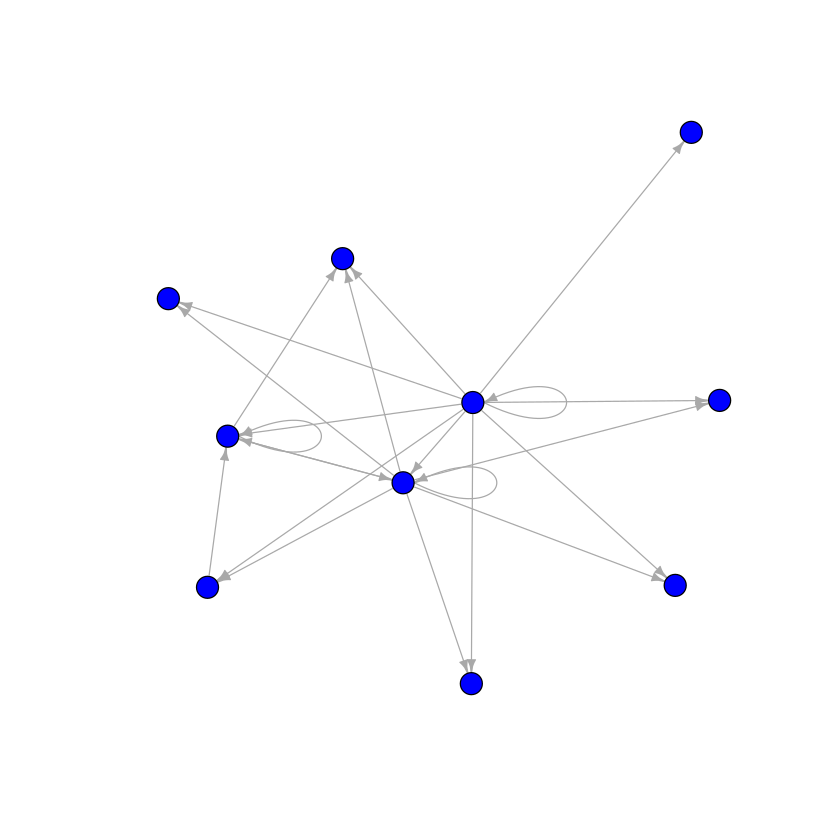

In [12]:
plot.igraph(x = tfs.network,vertex.size=8,edge.arrow.size=0.5,vertex.label="",vertex.color="blue")
write.graph(tfs.network,file="red_transcripcional_tf.gml",format="gml")

tfs.network<- read.graph(file = "red_transcripcional_tf.gml", format = "gml" )

El fichero generado con los nodos y aristas de la red es el siguiente: [red_transcripcional](red_transcripcional_inducida_tf.gml) 

Al cargar esta red en Cytoscape haciendo uso de la plantilla organic, obtenemos la siguiente red transcripcional: 

<img src="red_transcripcional_inducida_tf.png" alt="Drawing" style="width: 1500px;"/>

El análisis de la red que se realizará consiste en la búsqueda de motivos de red o patrones no aleatorios. Un motivo de red es un subgrafo que aparece un número significativo de veces, siendo mayor este número al que aparece en una red generada de forma aleatoria y que presenta las mismas propiedades.

En primer lugar se determinará si esta red es o no libre de escala. En una red libre de escala algunos nodos están altamente conectados, aunque el grado de conexión de casi todos los nodos es bastante bajo. Se considera una red libre de escala cuando su distribución del grado de los nodos se ajusta a una potencial negativa. Para determinar si la red es o no libre de escala se usará el test de **Kolmogorov-Smirnov**, en este se formula un contraste de hipótesis donde la hipótesis nula afirma que la distribución del grado de los nodos se ajusta a una potencial negativa y la hipótesis afirmativa afirma lo contrario. De acuerdo al contraste de hipótesis planteado para considerar que la red es libre de escala debemos obtener un p-valor cercano a 1. 


Call:
lm(formula = log10.degrees.frequencies ~ log10.node.degrees)

Residuals:
       1        2        3        7       11 
-0.24339  0.36012  0.05994 -0.23932  0.06265 

Coefficients:
                    Estimate Std. Error t value Pr(>|t|)
(Intercept)         0.243388   0.226675   1.074    0.362
log10.node.degrees -0.004812   0.348363  -0.014    0.990

Residual standard error: 0.2908 on 3 degrees of freedom
Multiple R-squared:  6.359e-05,	Adjusted R-squared:  -0.3332 
F-statistic: 0.0001908 on 1 and 3 DF,  p-value: 0.9898


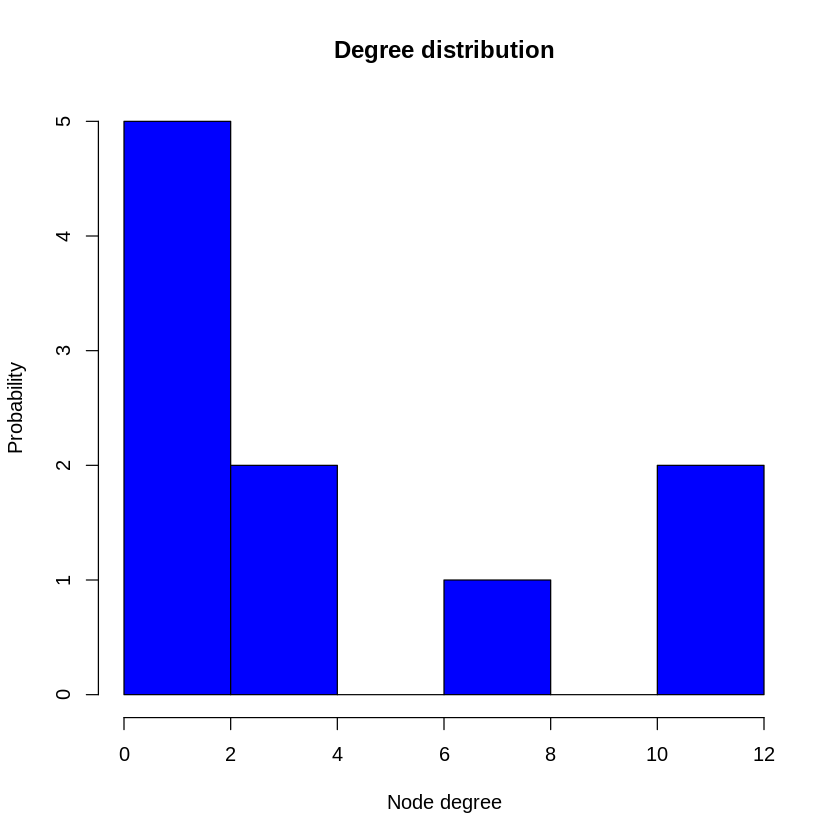

In [13]:
# Cálculo del grado de los nodos

network.degrees <- degree(tfs.network)
hist(network.degrees,col="blue",xlab="Node degree", ylab="Probability",main="Degree distribution")

# Cálculo de la frecuencia absoluta del grado de los nodos
degree.frequencies <- table(network.degrees)

# Eliminamos nodos con grado 0 para poder aplicar log10

# Transformación logar?tmica
log10.degrees.frequencies <- log10(degree.frequencies)
log10.node.degrees <- log10(as.numeric(names(degree.frequencies)))

# Regresión lineal
lm.r <- lm(log10.degrees.frequencies ~ log10.node.degrees)
summary(lm.r)

Dado que el p-valor obtenido es de 0.9898 podemos afirmar que la red no es libre de escala. La distribución del grado de los nodos obtenidas se representa en el histograma anterior.

Para generar las redes aleatorias emplearemos el modelo de Erdos-Renyi, que genera redes aleatorias que siguen una distribución de Poisson con un número de nodos y aristas dados. 

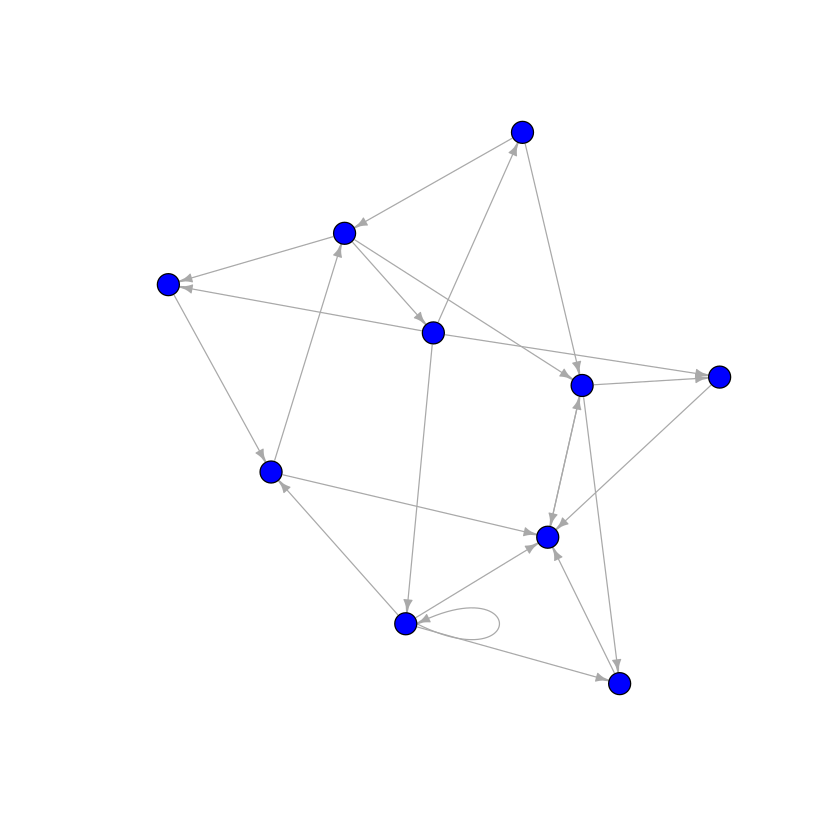

In [14]:
random.graph <- erdos.renyi.game(n=10, p.or.m=22, type="gnm", directed=TRUE, loops=TRUE)
plot.igraph(x = random.graph,vertex.size=8,edge.arrow.size=0.5,vertex.label="",vertex.color="blue")

En primer lugar se estudiará si la autorregulación es un motivo de red. Para comprobar el número de genes que se autorregulan en una red basta con sumar los elementos de la diagonal principal. Este número se debe comparar con el número de genes autorregulados en la red creada de forma aleatoria. Para comprobar si la autorregulación es un motivo de red se generan 1000 redes de forma aleatoria y se calcula el número de autorregulaciones en cada una almacenándola en un vector. 

In [16]:
## Número de genes autorregulados en la red de factores de transcripción. 
tfs.adjacency <- as.matrix(get.adjacency(tfs.network))
tfs.adjacency
diag(tfs.adjacency)
autorregulation.in.tfs <- sum(diag(tfs.adjacency))
autorregulation.in.tfs

,AT1G01355,AT1G02500,AT1G02870,AT1G03365,AT1G04260,AT1G04290,AT1G04360,AT1G04770,AT1G04780,AT1G05520
AT1G01355,1,1,1,1,1,1,1,1,1,1
AT1G02500,0,0,0,0,0,0,0,0,0,0
AT1G02870,0,0,0,0,0,0,0,1,0,0
AT1G03365,0,0,0,0,0,0,0,0,0,0
AT1G04260,0,1,1,1,1,0,1,1,1,1
AT1G04290,0,0,0,0,0,0,0,0,0,0
AT1G04360,0,0,0,0,0,0,0,0,0,0
AT1G04770,0,1,0,0,1,0,0,1,0,0
AT1G04780,0,0,0,0,0,0,0,0,0,0
AT1G05520,0,0,0,0,0,0,0,0,0,0


AT1G01355 AT1G02500 AT1G02870 AT1G03365 AT1G04260 AT1G04290 AT1G04360 AT1G04770 
        1         0         0         0         1         0         0         1 
AT1G04780 AT1G05520 
        0         0

[1] 3

In [17]:
## Número de genes autorregulados en la red 
autorregulation.in.random <- sum(diag(as.matrix(get.adjacency(random.graph))))
autorregulation.in.random 

[1] 3

In [18]:
## Generación de 1000 redes aleatorias

autorregulation.random.graphs <- vector(length=10000, mode="numeric")

for (i in 1:10000)
{
  random.graph <- erdos.renyi.game(n=10, p.or.m=22, type="gnm", directed=TRUE, loops=TRUE)
  autorregulation.random.graphs[i] <- sum(diag(as.matrix(get.adjacency(random.graph))))
}

mean(autorregulation.random.graphs)
sd(autorregulation.random.graphs)

sum(autorregulation.random.graphs > autorregulation.in.tfs)/10000

[1] 2.1878

[1] 1.251914

[1] 0.1464

Se han generado 1000 redes de forma aleatoria, por lo que para considerar que la autorregulación es un motivo de red el p-valor obtenido debería ser menor a 10^-4. El p-valor obtenido es de 0.1531 por lo que la autorregulación no se consideraría un motivo de red. 

A continuación, se determinarán los motivos de red de tres nodos mediante la función **graph.motifs**, que recibe como entrada una red y un tamaño de subgrado determinado (actualmente solo puede recibir tamaños de 3 o 4) y devuelve el número de veces que encontramos cada subgrafo en la red. 

Mediante la función **graph.isocreate** podemos generar todos los posibles grafos del tamaño dado. Es importante tener en cuenta que la enumeración empieza en 0. 



In [19]:
## Determinación de los subgrafos

occurrency.subgraph.three.nodes <- graph.motifs(tfs.network, size=3)
occurrency.subgraph.three.nodes
length(occurrency.subgraph.three.nodes)

[1] NA NA  0 NA  1  0 42  8  1  4  0  0  1  1  0  0

[1] 16

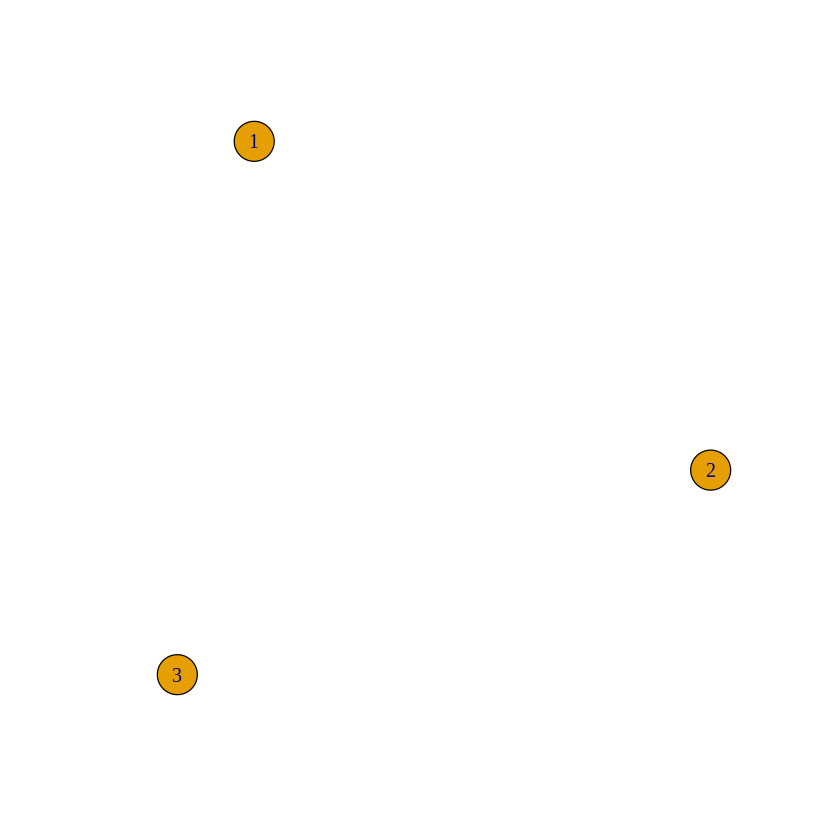

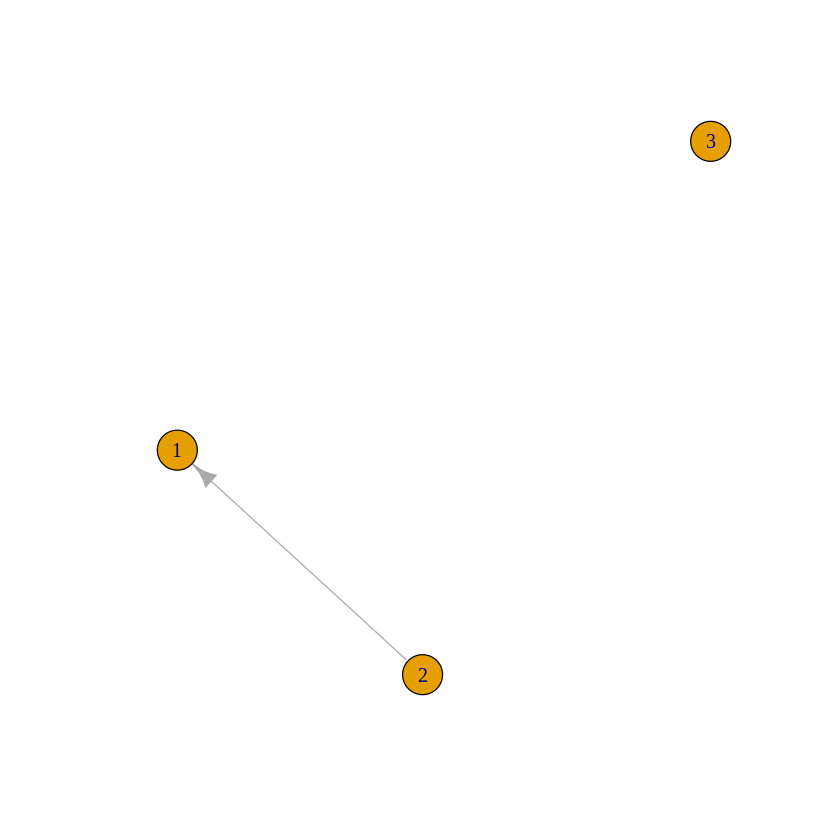

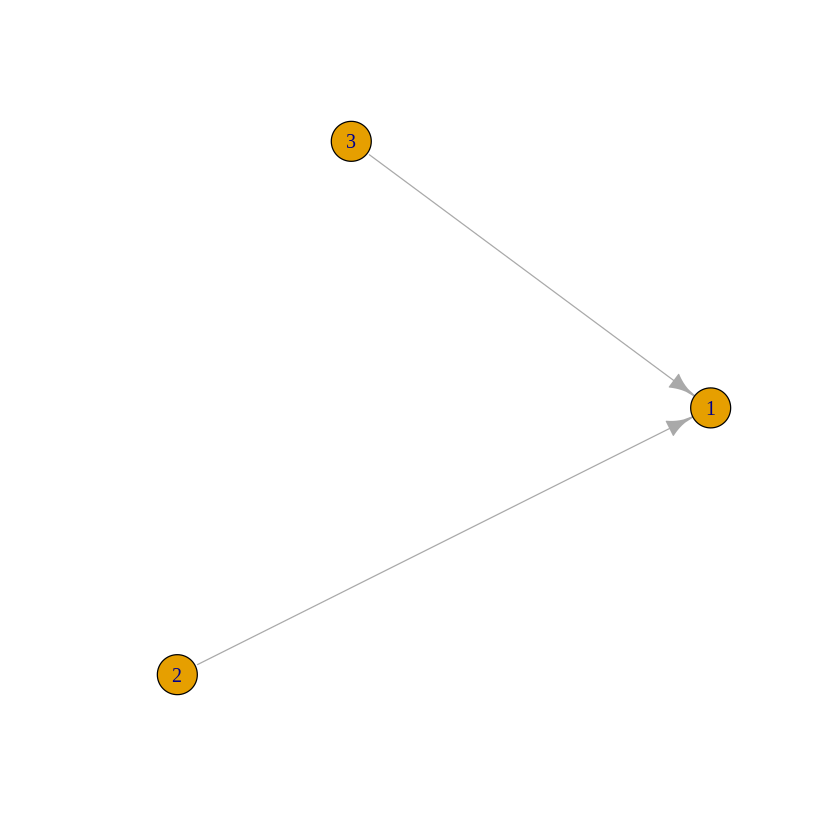

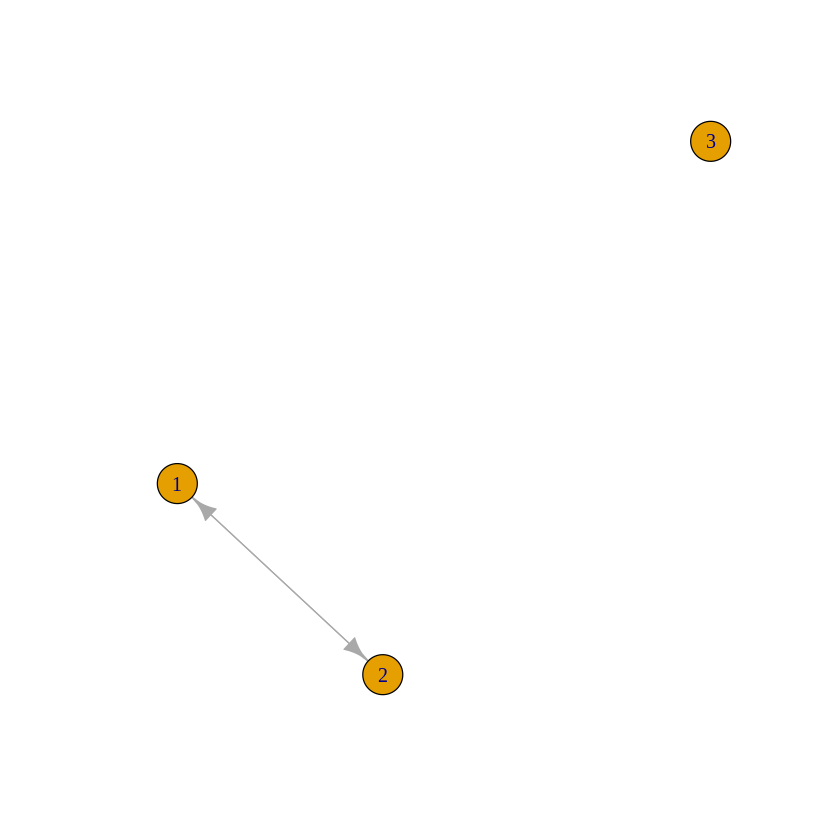

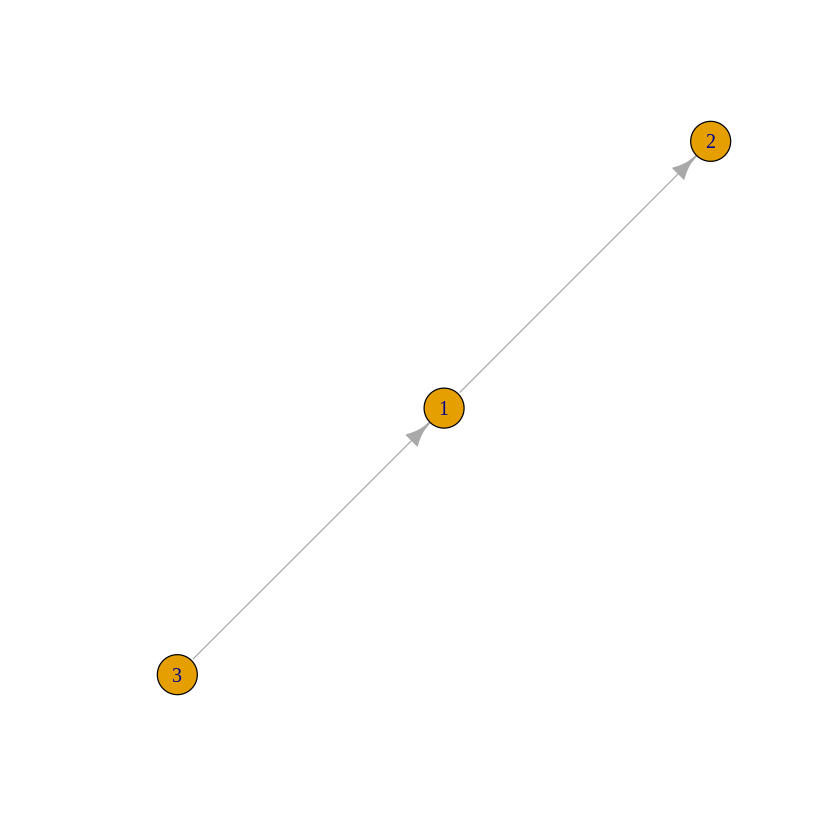

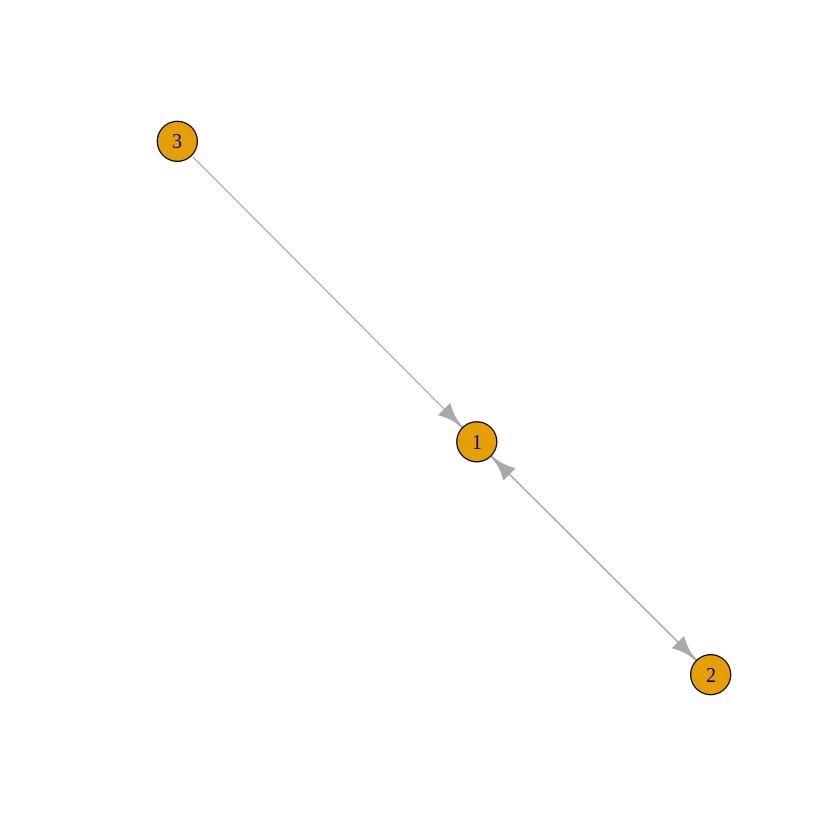

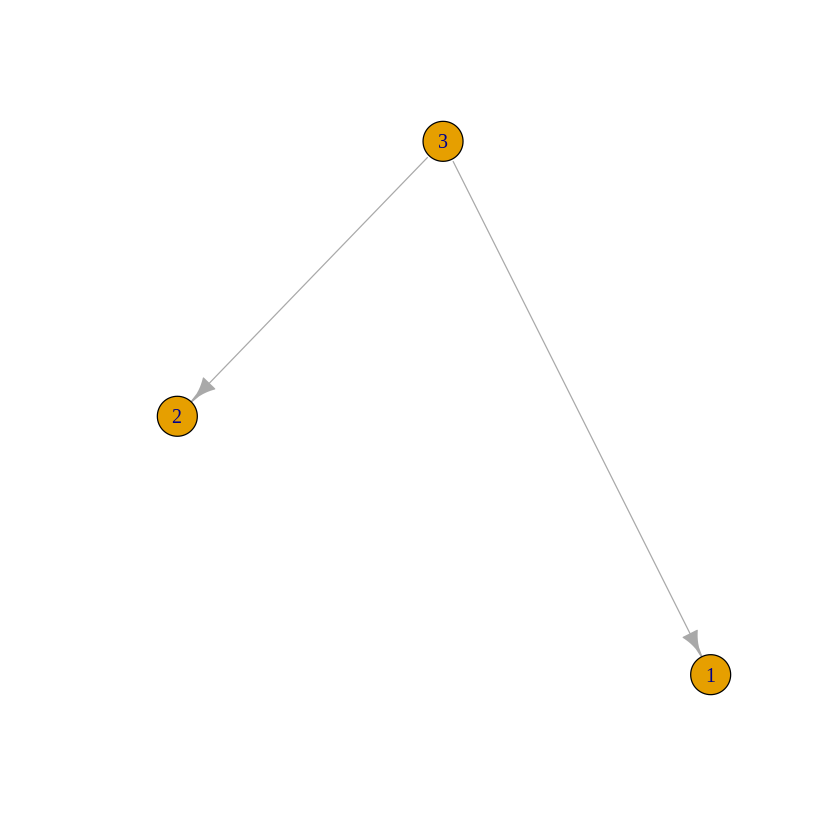

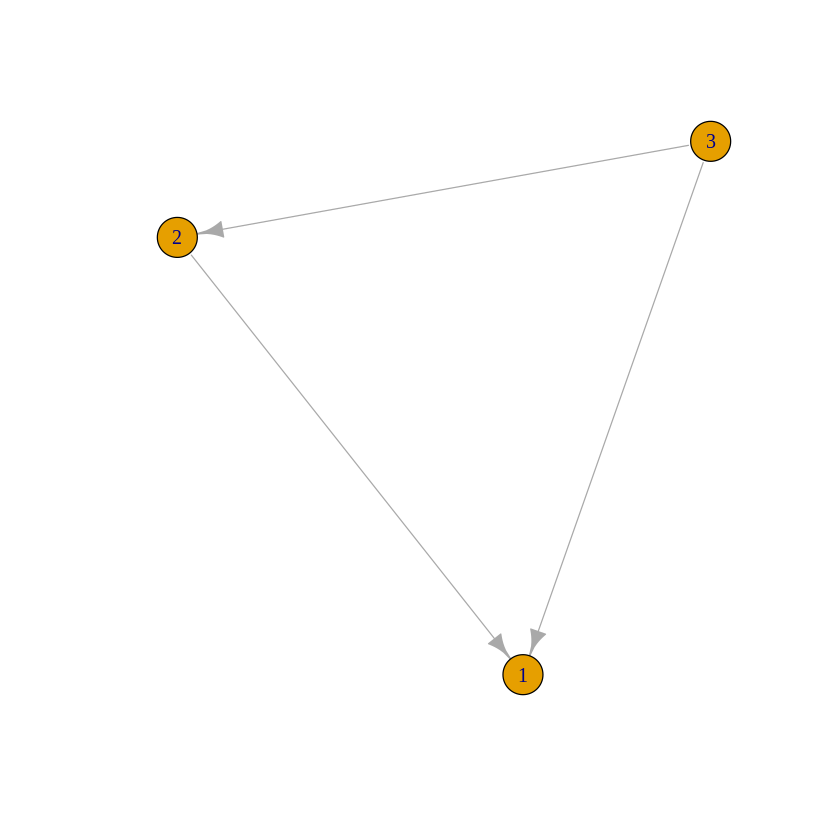

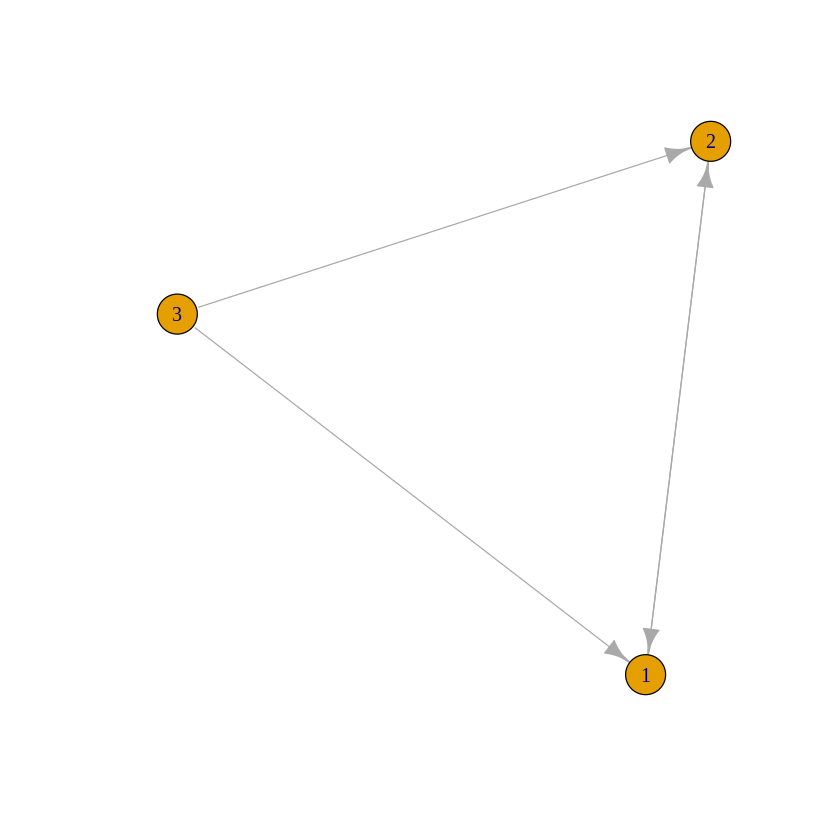

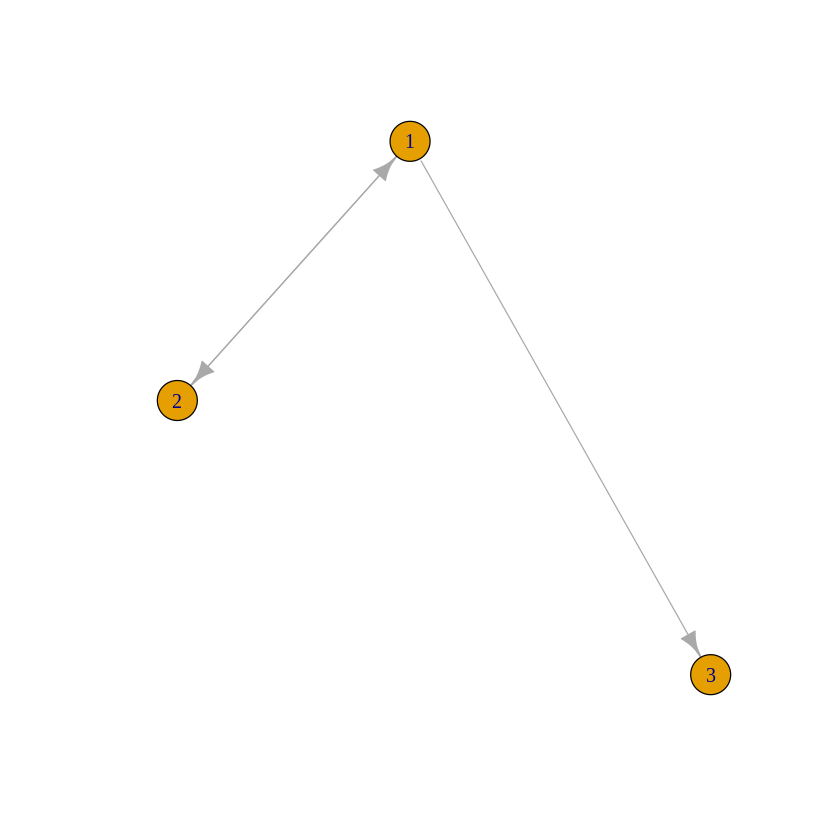

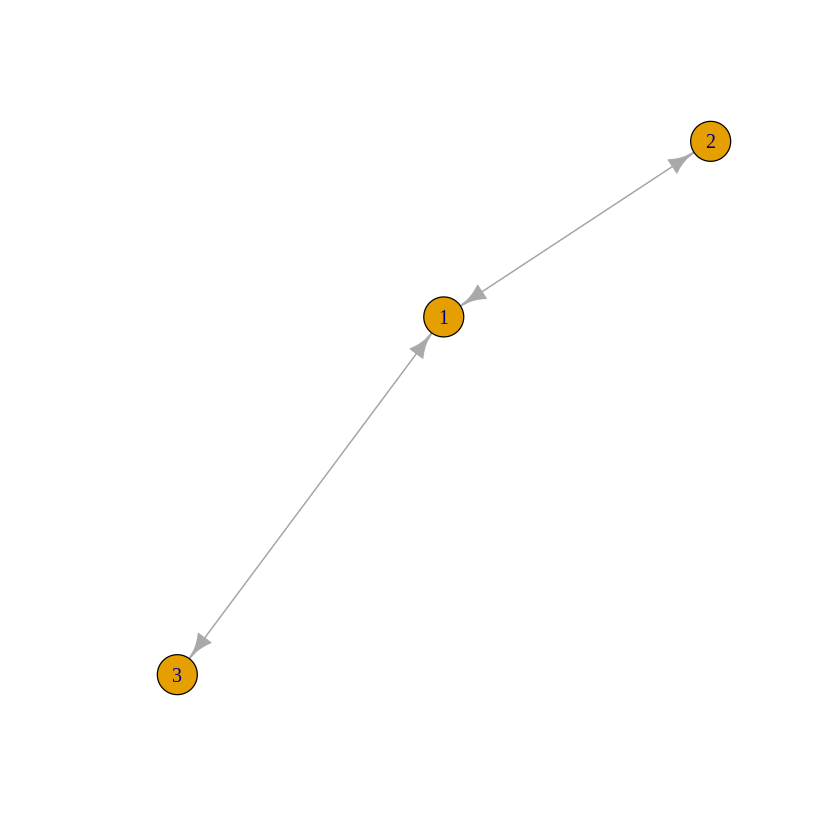

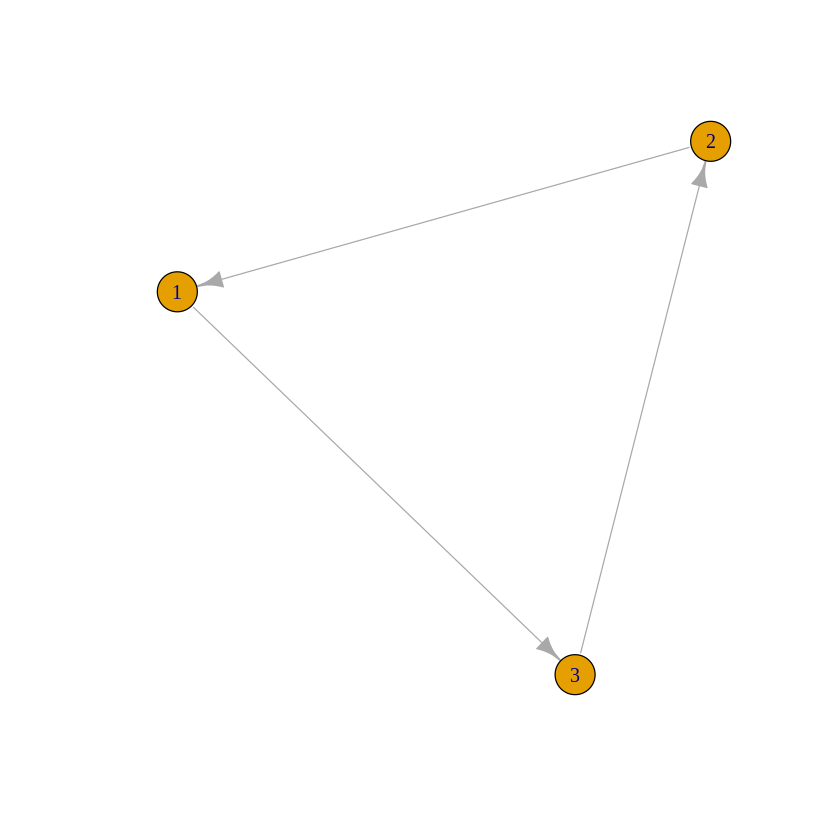

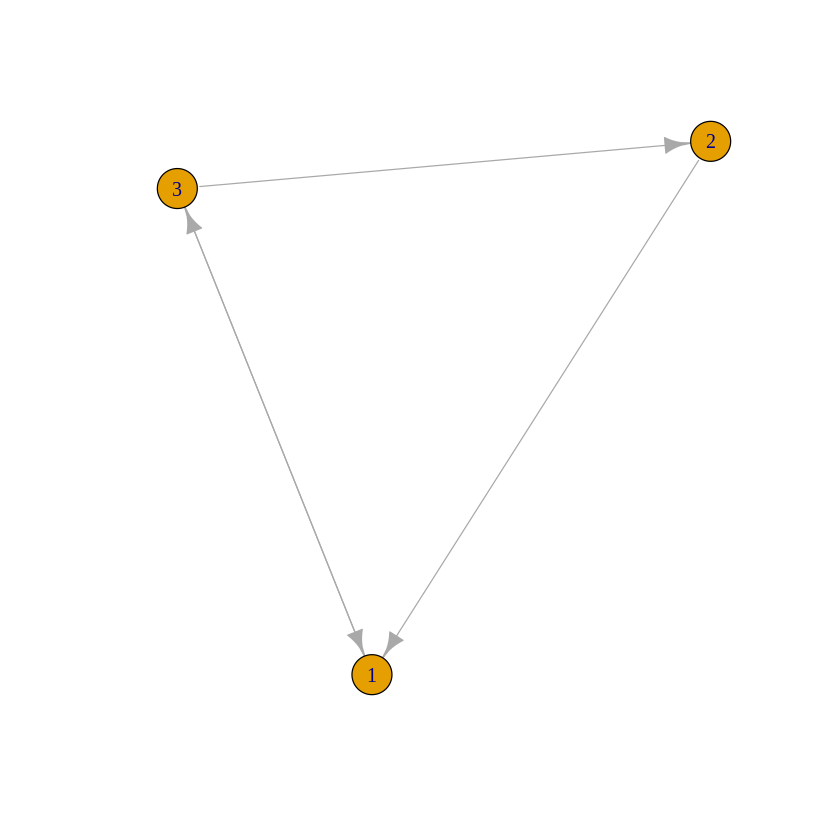

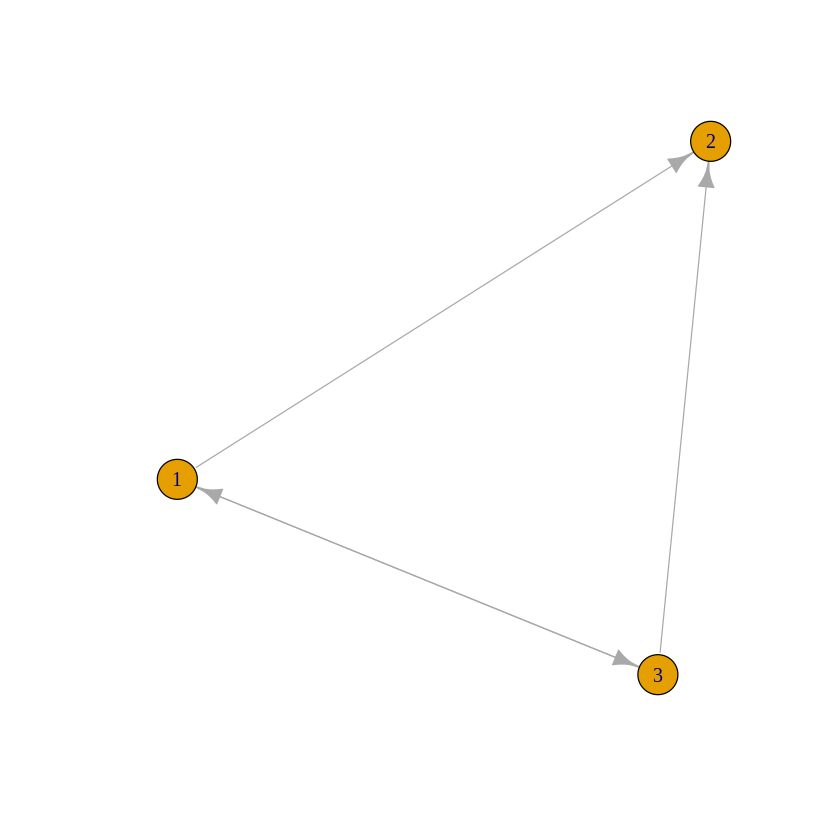

In [20]:
##Los grafos de 3 nodos que encontramos son los siguientes:

plot.igraph(graph.isocreate(size=3, number=0))
plot.igraph(graph.isocreate(size=3, number=1))
plot.igraph(graph.isocreate(size=3, number=2))
plot.igraph(graph.isocreate(size=3, number=3))
plot.igraph(graph.isocreate(size=3, number=4))
plot.igraph(graph.isocreate(size=3, number=5))
plot.igraph(graph.isocreate(size=3, number=6))
plot.igraph(graph.isocreate(size=3, number=7))
plot.igraph(graph.isocreate(size=3, number=8))
plot.igraph(graph.isocreate(size=3, number=9))
plot.igraph(graph.isocreate(size=3, number=10))
plot.igraph(graph.isocreate(size=3, number=11))
plot.igraph(graph.isocreate(size=3, number=12))
plot.igraph(graph.isocreate(size=3, number=13))

Se observa la presencia de siete posibles motivos en los subgrafos 5, 7, 8, 9, 10, 13 y 14, por lo que estos serán los que se analizarán para poder determinar los motivos de red. Para ello se seguirá el mismo procedimiento que para la autorregulación, basado en la generación de redes aleatorias. En este caso tendremos un acumulador matricial cuyas filas se corresponderán con el número de subgrafos. 

In [21]:
motifs.3.random.graph <- matrix(0,nrow=1000, ncol=16)
motifs.3.random.graph[1:3,]

for (i in 1:1000)
{
  random.graph <- erdos.renyi.game(n=10, p.or.m=22, type="gnm", directed=TRUE, loops=TRUE)
  motifs.3.random.graph[i,] <- graph.motifs(random.graph, size=3)
}

motifs.3.random.graph[1:3,]

0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


NA,NA,8,NA,19,0,11,5,2,1,0,0,1,0,0,0
NA,NA,7,NA,19,2,8,3,0,0,0,2,0,2,0,0
NA,NA,6,NA,14,4,6,2,0,2,0,2,0,1,0,0


A continuación, se comparará el número de motivos obtenidos para los diferentes subgrafos con el número de motivos encontrados en la red generada. 

[1] 1

[1] 13.25

[1] 4.548207

[1] 0.999

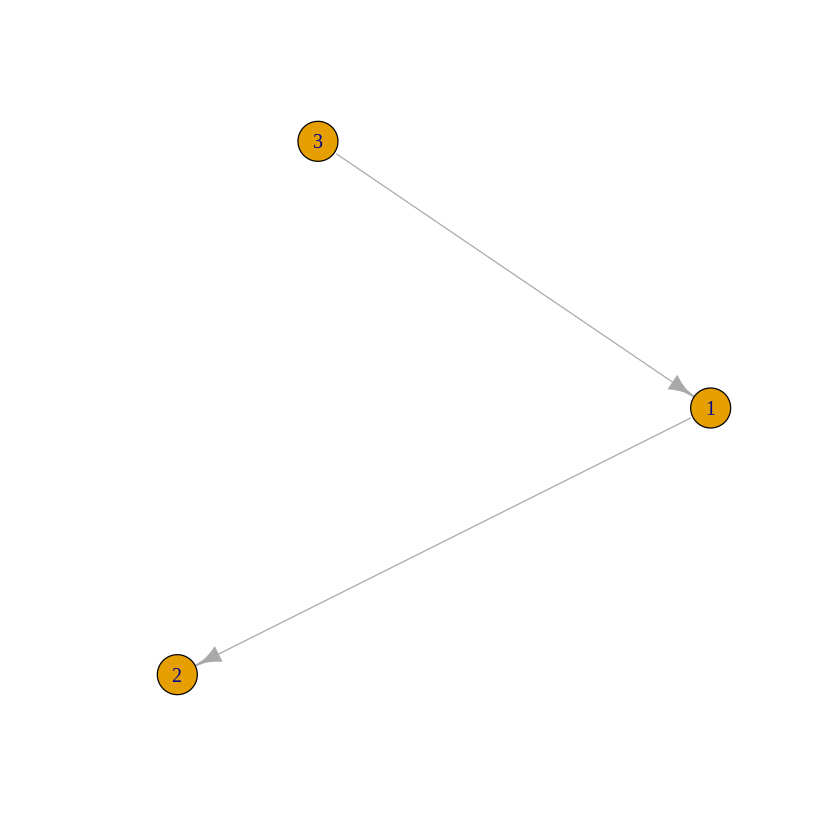

In [25]:
## subgrafo 5
plot(graph.isocreate(size=3, number=4))
occurrency.subgraph.three.nodes[5]

mean(motifs.3.random.graph[,5])
sd(motifs.3.random.graph[,5])
sum(motifs.3.random.graph[,5] >1)/1000

[1] 42

[1] 6.541

[1] 2.991198

[1] 0

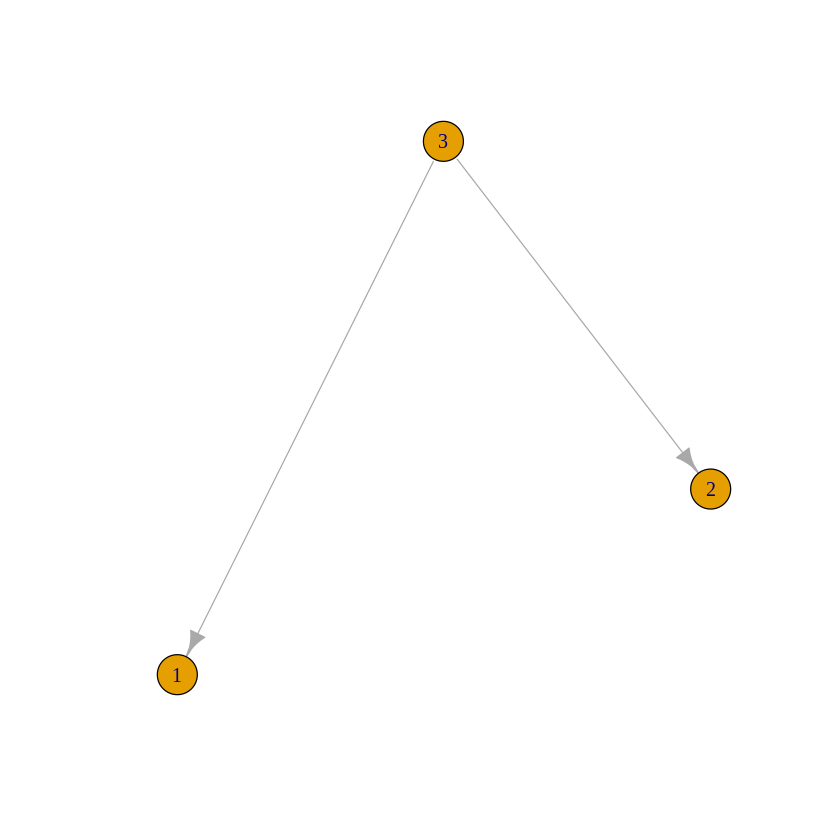

In [24]:
## subgrafo 7
plot(graph.isocreate(size=3, number=6))
occurrency.subgraph.three.nodes[7]

mean(motifs.3.random.graph[,7])
sd(motifs.3.random.graph[,7])
sum(motifs.3.random.graph[,7] > 42)/1000

[1] 8

[1] 3.427

[1] 2.237337

[1] 0.024

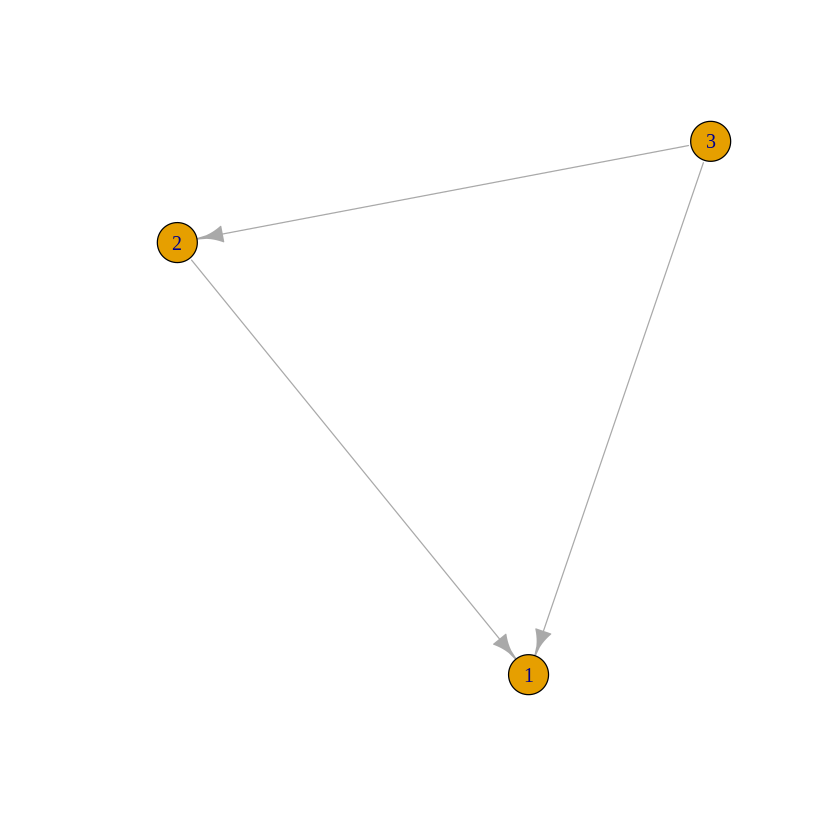

In [23]:
## Subgrafo 8 
plot(graph.isocreate(size=3, number=7))
occurrency.subgraph.three.nodes[8]

mean(motifs.3.random.graph[,8])
sd(motifs.3.random.graph[,8])
sum(motifs.3.random.graph[,8] > 8)/1000

[1] 1

[1] 0.452

[1] 0.681293

[1] 0.082

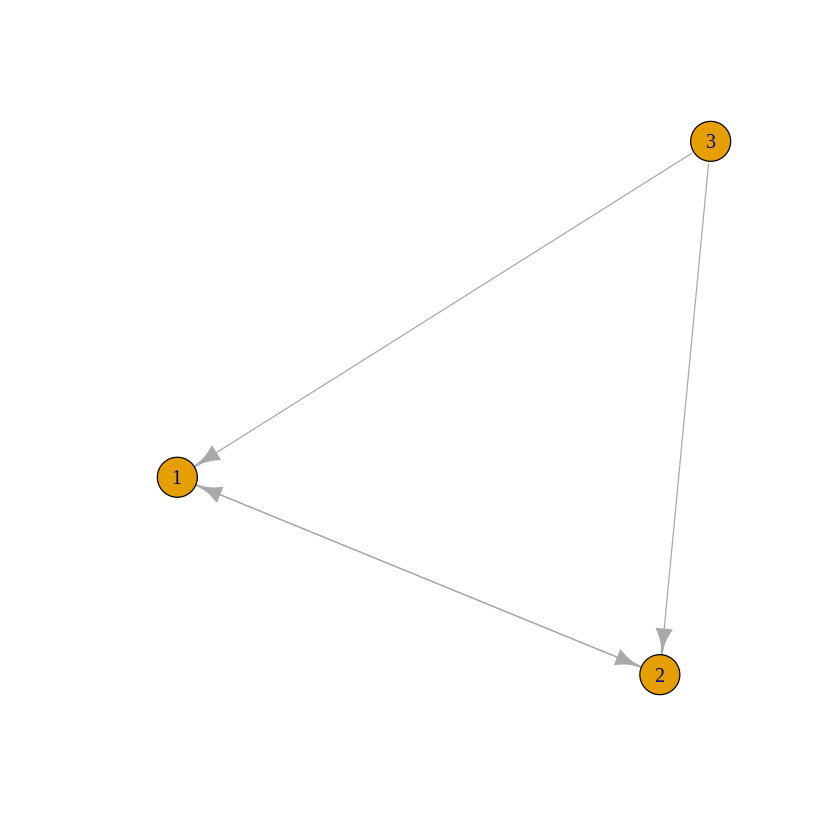

In [22]:
## Subgrafo 9
plot(graph.isocreate(size=3, number=8))
occurrency.subgraph.three.nodes[9]

mean(motifs.3.random.graph[,9])
sd(motifs.3.random.graph[,9])
sum(motifs.3.random.graph[,9] > 1)/1000

[1] 4

[1] 3.584

[1] 2.369928

[1] 0

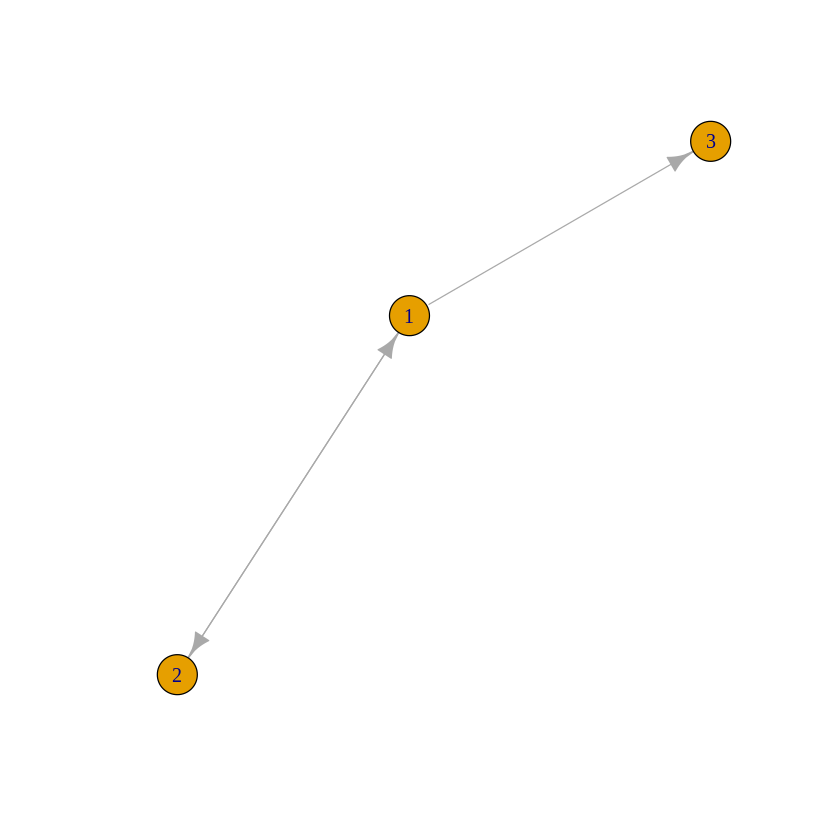

In [26]:
## Subgrafo 10
plot(graph.isocreate(size=3, number=9))
occurrency.subgraph.three.nodes[10]

mean(motifs.3.random.graph[,10])
sd(motifs.3.random.graph[,10])
sum(motifs.3.random.graph[,10] > 14)/1000

[1] 1

[1] 0.914

[1] 0.9431296

[1] 0.242

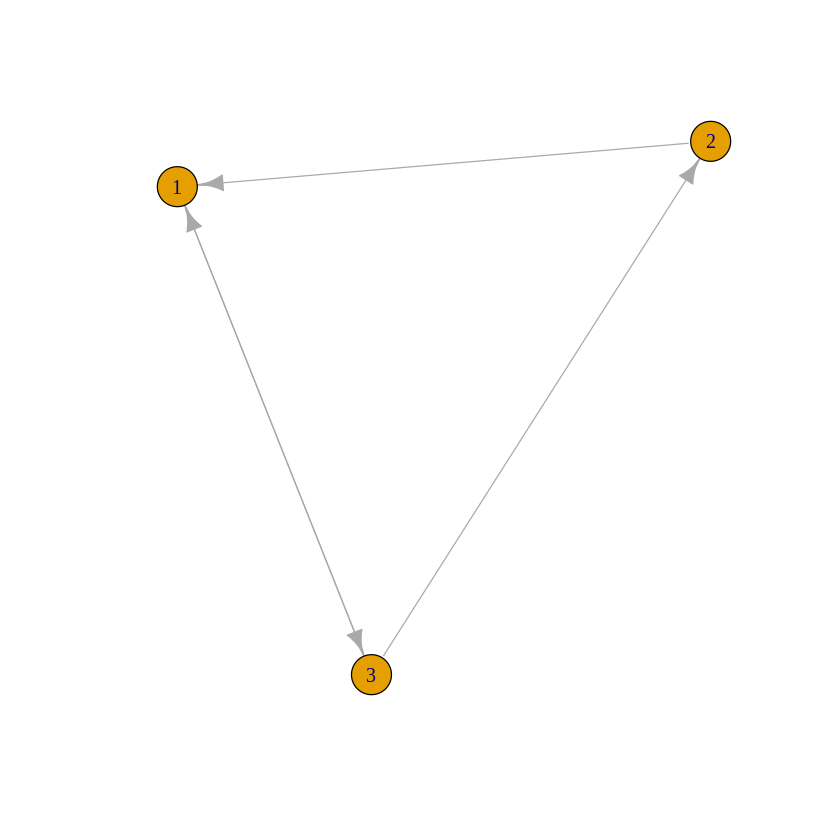

In [27]:
## Subgrafo 13 
plot(graph.isocreate(size=3, number=12))
occurrency.subgraph.three.nodes[13]

mean(motifs.3.random.graph[,13])
sd(motifs.3.random.graph[,13])
sum(motifs.3.random.graph[,13] > 1)/1000

[1] 1

[1] 0.436

[1] 0.6575229

[1] 0.071

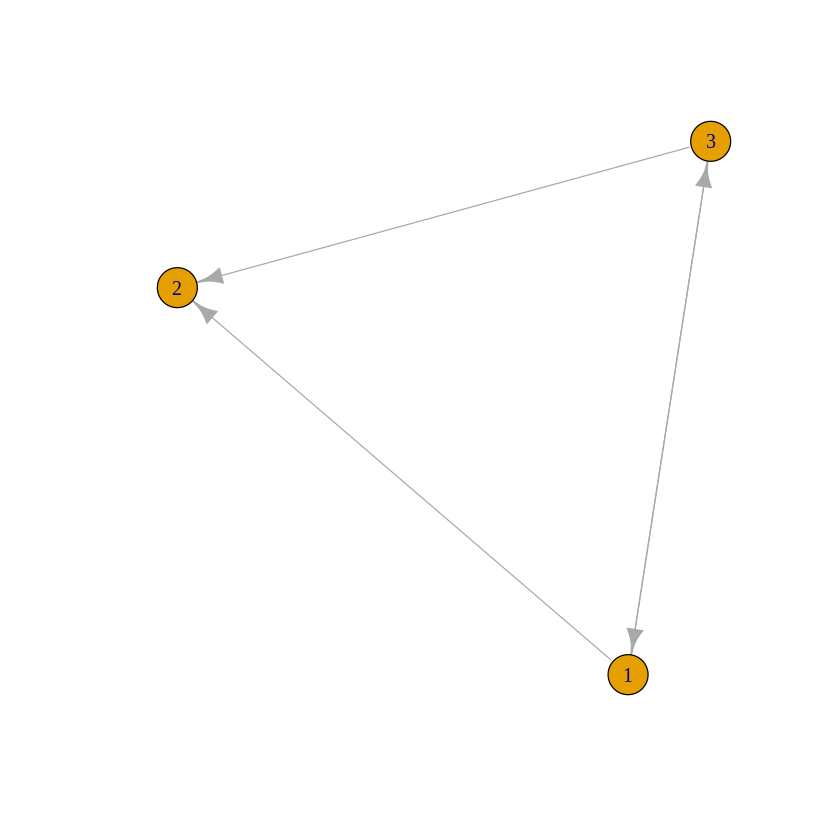

In [28]:
## Subgrafo 14
plot(graph.isocreate(size=3, number=13))
occurrency.subgraph.three.nodes[14]

mean(motifs.3.random.graph[,14])
sd(motifs.3.random.graph[,14])
sum(motifs.3.random.graph[,14] > 1)/1000

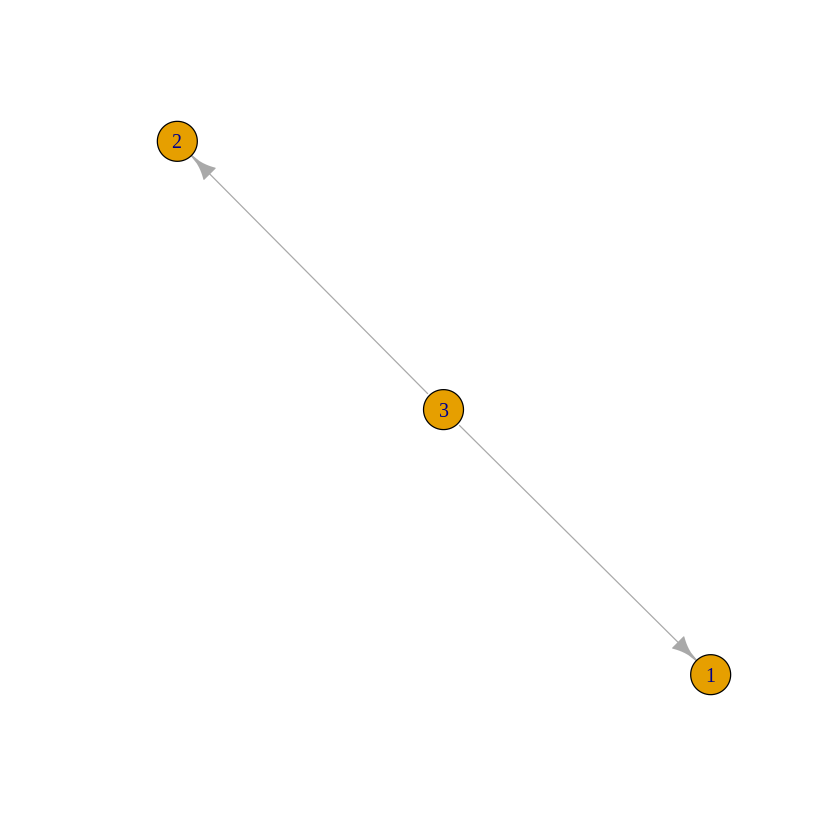

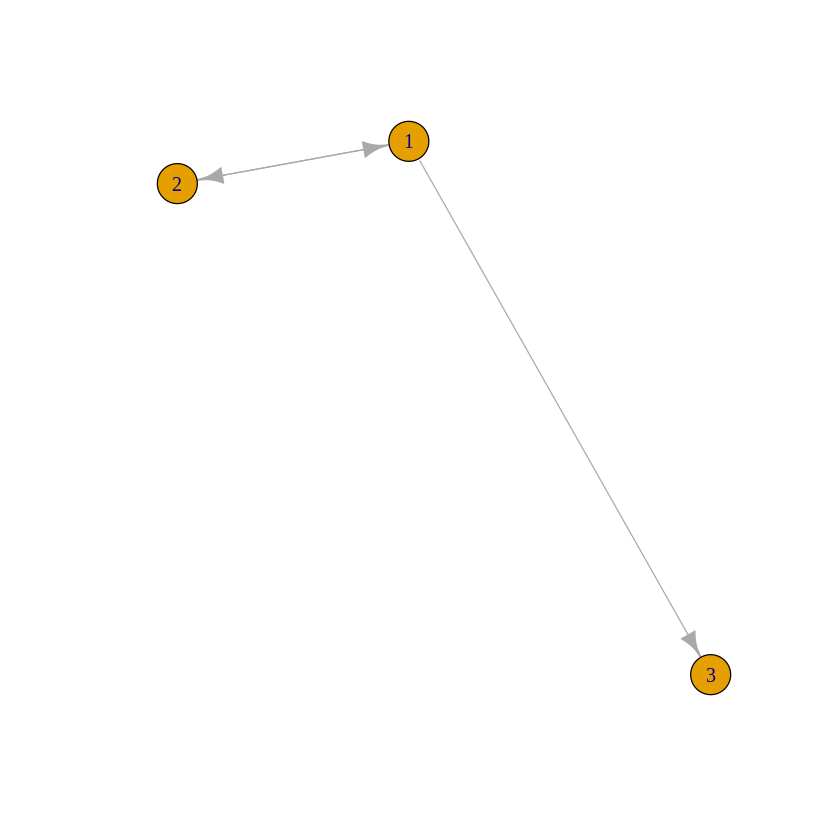

In [29]:
## Los subgrafos que son motivos con interés biológico son el 7 y el 10

subgrafo.7 <- graph.isocreate(size=3, number=6)
subgrafo.10<- graph.isocreate(size=3, number=9)

plot(subgrafo.7)
plot(subgrafo.10)

Para considerar que el subgrafo es un motivo de red biológico el p-valor obtenido debe ser menor a 10^-3 ya que se han generado 100 redes aleatorias. Se obtiene que los subgrafos que presentan interés biológico son el 7 y el 10. 

<a id="conclusiones"></a>

## 5.  CONCLUSIONES

El principal objetivo de este ensayo es determinar si los factores transcripcionales de *A.tahliana* están relacionados entre sí a pesar de que, en principio, no todos cumplen la misma función. Tal y como observamos en la red generada en Cytoscape se observa que todos los nodos están conectados entre sí, aunque los que presentan una mayor relación son aquellos que cumplen una función similar. 

A partir del ensayo realizado también podemos determinar que esta red no es libre de escala, lo que significa que no hay un nodo que cumpla la función de Hub. Un hub es un nodo concentrador que tiene un gran número de vecinos y tienen un papel central en la red. El hecho de que la red no sea libre de escala implica que es sensible a ataques aleatorios ya que la eliminación aleatoria de un nodo en la red afectará a un gran número de nodos; sin embargo, la red será robusta a ataques dirigidos. 

Finalmente, se han determinado los motivos de red con interés biológico. En el caso del motivo de red número siete el nodo representado con el número 3 se encuentra regulando tanto al 1 como al 2; este último también se encuentra regulando al motivo número 1, por lo que este gen tiene una doble regulación. Este motivo se corresponde con un bucle de anteroalimentación (feedforward loops). En el caso del motivo 10 el nodo número 1 se encuentra en un bucle de retroalimentación tanto con el nodo 2 como con el 3. Sería conveniente realizar ensayos adicionales para determinar de qué tipo de bucle de retroalimentación y de anteroalimentación se tratan. 

<a id="referencias"></a>

## 6. REFERENCIAS

### Datos descargados de la subase de datos de NCBI, GEO
Los datos analizados en este trabajo fueron depositados en la base de datos de NCBI, Gen Expression Omnibus (McEwan, Deborah L et al., 2016) y se puede acceder a ellos a través de los respectivos números de acceso: GSE79554 o en el siguiente enlace
https://www.ncbi.nlm.nih.gov/geo/query/acc.cgi?acc=GSE79554

### R Studio, Bioconductor y paquetes utilizados en el análisis computacional
#### RStudio
- RStudio Team (2015). RStudio: Integrated Development for R. RStudio, Inc., Boston, MA URL http://www.rstudio.com/.
    - **Paquete igraph.** Csardi G, Nepusz T: The igraph software package for complex network research, InterJournal, Complex Systems 1695. 2006. http://igraph.org
    
Los paquetes de R citados anteriormente fueron descargados de Bioconductor.

#### Bioconductor

Orchestrating high-throughput genomic analysis with Bioconductor. W. Huber, V.J. Carey, R. Gentleman, ..., M. Morgan Nature Methods, 2015:12, 115. https://www.bioconductor.org/



### Construcción de la red con Cytoscape
Shannon P, Markiel A, Ozier O, Baliga NS, Wang JT, Ramage D, Amin N, Schwikowski B, Ideker T. Cytoscape: a software environment for integrated models of biomolecular interaction networks
Genome Research 2003 Nov; 13(11):2498-504

### Repositorio de GitHub
Esta tarea ha sido construida a través del repositorio [REDES](https://github.com/saracart/REDES.git), bajo una licencia GNU GENERAL PUBLIC LICENSE (Version 3, 29 June 2007).


### Material docente
- **Diapositivas de clase**
    - Redes Transcripcionales (Francisco J. Romero-Campero): [Presentación](redes_transcripcionales.pdf)
- **Vídeos de Youtube**
    - [Visualización de Redes y atributos topológicos usando Cytoscape](https://www.youtube.com/watch?v=Q-1EpHE_4Pc&t=144s)
    
### Jupyter notebook
Thomas Kluyver, Benjamin Ragan-Kelley, Fernando Pérez, Brian Granger, Matthias Bussonnier, Jonathan Frederic, Kyle Kelley, Jessica Hamrick, Jason Grout, Sylvain Corlay, Paul Ivanov, Damián Avila, Safia Abdalla, Carol Willing, Jupyter Development Team. Jupyter Notebooks – a publishing format for reproducible computational workflows. 